In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [5]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) 
loss = criterion(logps, labels) 

Epoch 0 - Training loss: 0.505, Training Accuracy: 0.862, Validation Loss: 0.246, Validation Accuracy: 0.926
Epoch 1 - Training loss: 0.203, Training Accuracy: 0.940, Validation Loss: 0.163, Validation Accuracy: 0.953
Epoch 2 - Training loss: 0.147, Training Accuracy: 0.957, Validation Loss: 0.134, Validation Accuracy: 0.960
Epoch 3 - Training loss: 0.114, Training Accuracy: 0.967, Validation Loss: 0.112, Validation Accuracy: 0.965
Epoch 4 - Training loss: 0.092, Training Accuracy: 0.973, Validation Loss: 0.098, Validation Accuracy: 0.970
Epoch 5 - Training loss: 0.077, Training Accuracy: 0.978, Validation Loss: 0.090, Validation Accuracy: 0.972
Epoch 6 - Training loss: 0.066, Training Accuracy: 0.981, Validation Loss: 0.093, Validation Accuracy: 0.971
Epoch 7 - Training loss: 0.057, Training Accuracy: 0.984, Validation Loss: 0.078, Validation Accuracy: 0.976
Epoch 8 - Training loss: 0.049, Training Accuracy: 0.986, Validation Loss: 0.077, Validation Accuracy: 0.975
Epoch 9 - Training 

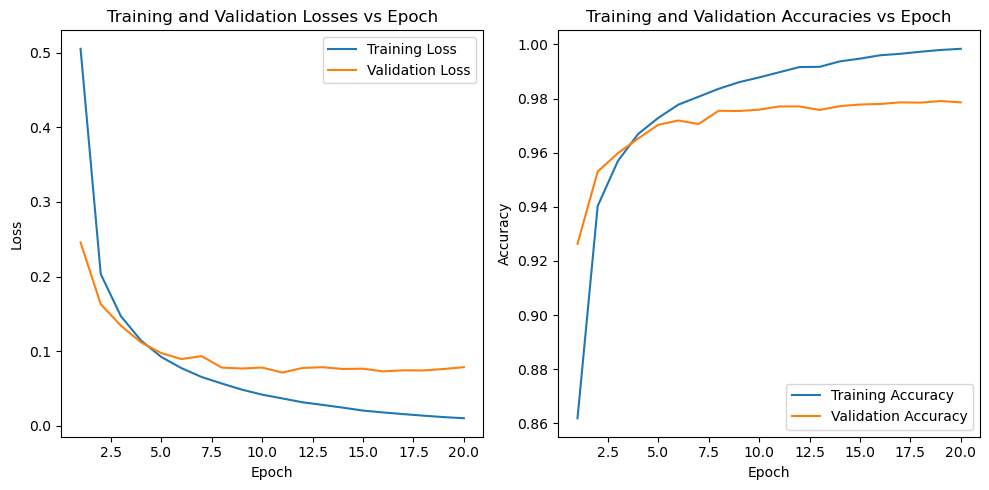

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

epochs = 20

# Lists to store accuracies and losses
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Training loop
for e in range(epochs):
    running_loss = 0
    correct_count_train, all_count_train = 0, 0

    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(output.data, 1)
        all_count_train += labels.size(0)
        correct_count_train += (predicted == labels).sum().item()

    # Calculate and store training accuracy and loss for the epoch
    train_accuracy = correct_count_train / all_count_train
    train_accuracies.append(train_accuracy)
    train_losses.append(running_loss / len(trainloader))

    # Validation loop
    correct_count_val, all_count_val = 0, 0
    val_loss = 0

    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1)
            logps = model(images)
            _, predicted = torch.max(logps.data, 1)
            all_count_val += labels.size(0)
            correct_count_val += (predicted == labels).sum().item()
            val_loss += criterion(logps, labels).item()

    # Calculate and store validation accuracy and loss for the epoch
    val_accuracy = correct_count_val / all_count_val
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / len(valloader))

    print("Epoch {} - Training loss: {:.3f}, Training Accuracy: {:.3f}, Validation Loss: {:.3f}, Validation Accuracy: {:.3f}".format(e, train_losses[-1], train_accuracy, val_losses[-1], val_accuracy))

# Plotting
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 5))

# Plotting Losses
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses vs Epoch')
plt.legend()

# Plotting Accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()